
# ASSIGNED Orthogonality of Legendre polynomials



**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

The Legendre polynomials are defined by:

$P_n(x) = \sum_{m=0}^M (-1)^m \frac{(2n - 2m)!}{2^n m! (n-m)!(n - 2m)!} x^{n-2m}$

where $M= n/2$ if n is even or $(n-1) / 2$ if $n$ is odd. $m!$ means "the factorial of m", for example, 4! = 1 \* 2 \* 3 \* 4 = 24. You can compute it like this:



In [1]:
from math import factorial
factorial(4)

24

Here is a helpful function to compute $M$:



In [1]:
import numpy as np
def M(n):
    if np.mod(n, 2) == 0:  # this means n is even.
        return int(n / 2)
    else:
        return int((n - 1) / 2)

Write a function that computes `P(x, n)`, and plot the function for `n=3` and `n=4` on the range of x=-1 to x=1.



These polynomials are *orthogonal* on the domain of x=-1 to 1, which means:

$\int_{-1}^{1} P_3(x) P_4(x) dx = 0$

Show that is true using your function.



Discuss whether this is obvious from the graph.




## solution



First, we define a function for P(x, n). You can use the M function above, or incorporate it into the function like this.



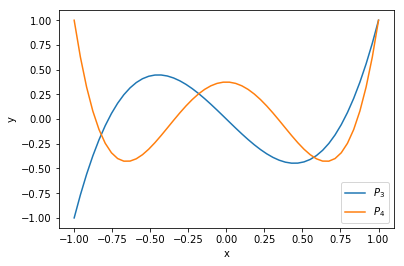

In [1]:
import numpy as np
from math import factorial

def P(x, n):
    if n % 2 == 0:
        M = n / 2
    else:
        M = (n - 1) / 2

    result = 0.0 * x
    for m in range(0, int(M) + 1):
        fnum = factorial(2 * n - 2 * m)
        fden = 2**n * factorial(m) * factorial(n - m) * factorial(n - 2 * m)
        result += (-1)**m * fnum / fden * x**(n - 2*m)
    return result

%matplotlib inline
import matplotlib.pyplot as plt

X = np.linspace(-1, 1)
plt.plot(X, P(X, 3))
plt.plot(X, P(X, 4))
plt.legend(['$P_3$', '$P_4$'])
plt.xlabel('x')
plt.ylabel('y')

To evaluate the integral, we define a function for the integrand, and then use the quad function.



In [1]:
from scipy.integrate import quad

def P34(x):
    return P(x, 3) * P(x, 4)

I, _ = quad(P34, -1, 1)
print(f'The integral evaluates to {I}')

The integral evaluates to 0.0

If you look at the plots, you can see that P3 appears to be an odd function, and P4 is an even function. The product of an even and odd function is also an odd function. Finally, the integral of an odd function over a symmetric interval is always zero. Below is a demonstration that the product is actually odd, i.e. $f(-x) = -f(x)$.



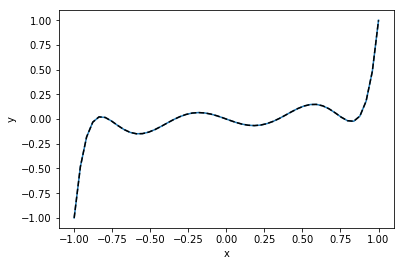

In [1]:
P34(-0.5), P34(0.5)
plt.plot(X, P34(X), X, -P34(-X), 'k--')
plt.xlabel('x')
plt.ylabel('y')